In [1]:
import pandas as pd

data = './data/austin_weather.csv'
data1 = './data/bengaluru_weather.csv'

df = pd.read_csv(data)
df1 = pd.read_csv(data1)

In [2]:
df.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [6]:
df.drop(columns=['Date'],inplace=True)

In [7]:
df.head(5)

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Year,Month,day
0,74,60,45,67,49,43,93,75,57,29.86,...,7,2,20,4,31,0.46,"Rain , Thunderstorm",2013,12,21
1,56,48,39,43,36,28,93,68,43,30.41,...,10,5,16,6,25,0,,2013,12,22
2,58,45,32,31,27,23,76,52,27,30.56,...,10,10,8,3,12,0,,2013,12,23
3,61,46,31,36,28,21,89,56,22,30.56,...,10,7,12,4,20,0,,2013,12,24
4,58,50,41,44,40,36,86,71,56,30.41,...,10,7,10,2,16,T,,2013,12,25


In [8]:
import numpy as np
df.replace('-', 0, inplace=True)  
df.replace('T', 0.0, inplace=True) 
df.replace('',0,inplace=True)

In [9]:
df['Events'].replace('', 'NULL', inplace=True)

In [10]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download('punkt',quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
spacy.cli.download('en_core_web_sm')

nlp = spacy.load('en_core_web_sm')

def processText(text):
    doc = nlp(text.lower())
    text = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(text)

df['Event'] = df['Events'].apply(processText)

df.drop(columns = ['Events'],inplace = True)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
cols = ['Year', 'Month', 'day']

In [12]:
df.head(2)

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Year,Month,day,Event
0,74,60,45,67,49,43,93,75,57,29.86,...,7,2,20,4,31,0.46,2013,12,21,rain thunderstorm
1,56,48,39,43,36,28,93,68,43,30.41,...,10,5,16,6,25,0,2013,12,22,


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df.Event = encode.fit_transform(df.Event)

X = df[cols]
y1 = df[['TempHighF','TempAvgF','TempLowF','HumidityAvgPercent','WindAvgMPH','Event']]

X_train,X_test,y_train,y_test = train_test_split(X,y1, test_size=0.2,random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [14]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

y_pred = model.predict(X_test)

print("Model Selection")
print("MAE : ",round(mean_absolute_error(y_test,y_pred),4))
print("RMSE : ",round(root_mean_squared_error(y_test,y_pred),4))
print("R2 Score :",round(r2_score(y_test,y_pred),4))

Model Selection
MAE :  3.9188
RMSE :  5.4937
R2 Score : 0.4732


In [27]:
def predict_weather():
    year = int(input("Enter year (e.g., 2025): "))
    month = int(input("Enter month (1-12): "))
    day = int(input("Enter day (1-31): "))

    input_data = np.array([[year, month, day]])
    
    Max_temp_pred, Avg_temp_pred, Low_temp_pred, hum_pred, wind_pred, event = model.predict(input_data)[0]

   # Avg_temp_pred, Max_temp_pred, Low_temp_pred = [(temp - 32) * 5/9 for temp in (Avg_temp_pred, Max_temp_pred, Low_temp_pred)]
    
    
    event = np.round(event).astype(int).reshape(-1)   
    event_preds = encode.inverse_transform(event)[0]

    print(f"Predicted Avg Temperature: {Avg_temp_pred:.2f}°C")
    print(f"Predicted Max Temperature: {Max_temp_pred:.2f}°C") 
    print(f"Predicted Low Temperature: {Low_temp_pred:.2f}°C") 
    print(f"Predicted Humidity: {hum_pred:.2f}%")
    print(f"Predicted wind: {wind_pred:.2f} MPH")
    print("Predicted Event :", "NONE" if event_preds == "" else event_preds)
    
predict_weather()

Enter year (e.g., 2025): 2025
Enter month (1-12): 3
Enter day (1-31): 30
Predicted Avg Temperature: 69.36°C
Predicted Max Temperature: 82.66°C
Predicted Low Temperature: 55.93°C
Predicted Humidity: 54.33%
Predicted wind: 4.57 MPH
Predicted Event : fog rain


C:\Users\hisha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# bengaluru weather

In [17]:
df1

,_id,Date,Rain,Temp Max,Temp Min
0,1,1951-01-01T00:00:00,0.000000,26.969999,15.650000
1,2,1951-02-01T00:00:00,0.000000,26.180000,14.690000
2,3,1951-03-01T00:00:00,0.000000,26.309999,14.950000
3,4,1951-04-01T00:00:00,0.000000,26.730000,14.840000
4,5,1951-05-01T00:00:00,0.000000,26.930000,14.530000
...,...,...,...,...,...
25495,25496,2020-10-20T00:00:00,9.504551,27.119953,20.917553
25496,25497,2020-10-21T00:00:00,21.641098,27.276970,20.379301
25497,25498,2020-10-22T00:00:00,8.157524,29.066013,20.851414
25498,25499,2020-10-23T00:00:00,19.896246,28.564169,20.739790


In [18]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day

In [19]:
df1.drop(columns=['Date'],inplace=True)

In [20]:
cols = ['Year', 'Month', 'day']
X = df1[cols]
y = df1[['Rain','Temp Max','Temp Min']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

modelBeng = RandomForestRegressor(n_estimators=100, random_state=42)
modelBeng.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [28]:
def predict_weather():
    year = int(input("Enter year (e.g., 2025): "))
    month = int(input("Enter month (1-12): "))
    day = int(input("Enter day (1-31): "))

    new_input_data = np.array([[year, month, day]])
    
    Rain_pred, Max_temp_pred, Min_temp_pred, = modelBeng.predict(new_input_data)[0]
    
    print(f"Predicted Min Temperature: {Min_temp_pred:.2f}°C")
    print(f"Predicted Max Temperature: {Max_temp_pred:.2f}°C")    
    print(f"Predicted rain: {Rain_pred:.2f}%")
 
    
predict_weather()

Enter year (e.g., 2025): 2025
Enter month (1-12): 3
Enter day (1-31): 30
Predicted Min Temperature: 20.57°C
Predicted Max Temperature: 35.63°C
Predicted rain: 0.00%


C:\Users\hisha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


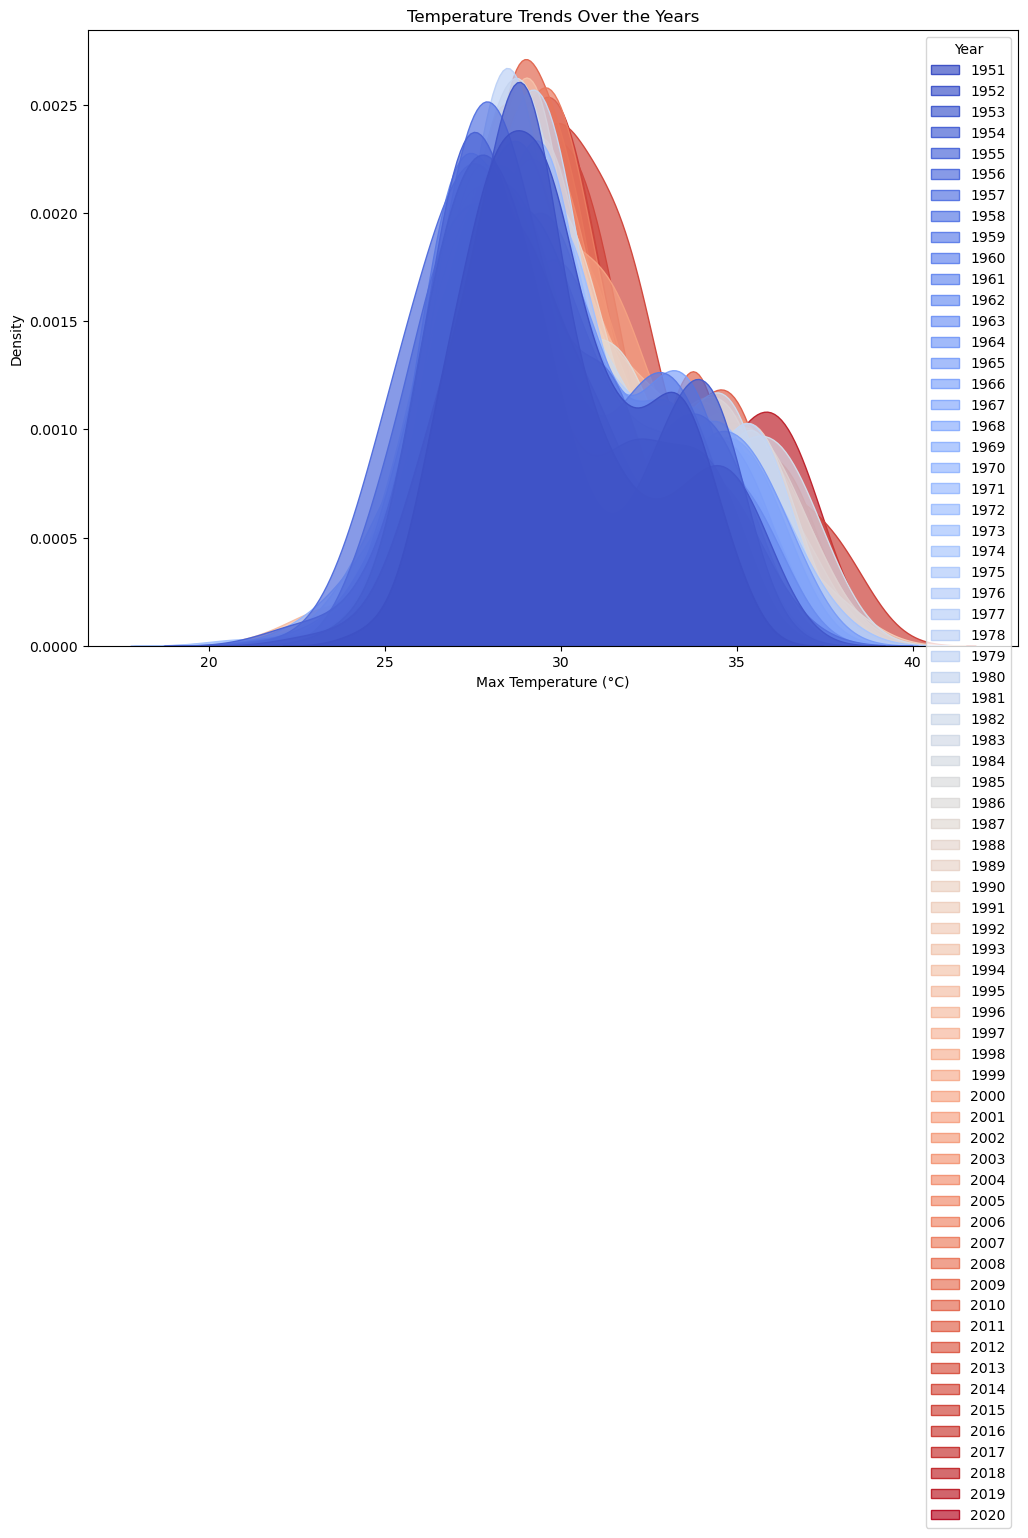

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df1["Year"] = df1["Year"].astype(str)

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df1, x="Temp Max", hue="Year", fill=True, palette="coolwarm", alpha=0.7)

plt.xlabel("Max Temperature (°C)")
plt.ylabel("Density")
plt.title("Temperature Trends Over the Years")

plt.show()

In [24]:
import joblib

joblib.dump(model, "ClassifierAustin.pkl")
joblib.dump(modelBeng, "ClassifierBengaluru.pkl")

print("Saved with updated One")

Saved with updated One
